In [25]:
!pip install -r ../requirement.txt

In [26]:
! brew install libomp

To reinstall 20.1.8, run:
  brew reinstall libomp


In [27]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
                                    StratifiedKFold, 
                                    cross_validate
                                    )
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [28]:
X_train = np.load("../artifacts/X_train_resampled.npz", allow_pickle=True)['arr_0']
Y_train = np.load("../artifacts/Y_train_resampled.npz", allow_pickle=True)['arr_0']
X_test = np.load('../artifacts/X_test.npz', allow_pickle=True)['arr_0']
Y_test = np.load('../artifacts/Y_test.npz', allow_pickle=True)['arr_0']

In [29]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(
                    use_label_encoder=False, 
                    eval_metric='logloss', 
                    random_state=42
                ),
    'CatBoost': CatBoostClassifier(
                    verbose=0, 
                    random_state=42
                )
}


In [30]:
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
                    )

In [31]:
trained_models = {}
for model_name, model in models.items():

    cv_results = cross_validate(
                                model,
                                X_train, Y_train,
                                cv=cv, scoring='f1',
                                return_estimator=True,
                                return_train_score=False
                                )
    test_scores = cv_results['test_score']
    best_index = np.argmax(test_scores)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name] = estimator

In [32]:
Y_hat_tests = {}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test
Y_hat_tests

{'Logistic Regression': array([0, 0, 1, ..., 0, 0, 0], shape=(1407,)),
 'Decision Tree': array([0, 0, 1, ..., 0, 0, 0], shape=(1407,)),
 'Random Forest': array([0, 0, 1, ..., 0, 0, 0], shape=(1407,)),
 'XGBoost': array([0, 0, 1, ..., 0, 0, 0], shape=(1407,)),
 'CatBoost': array([0, 0, 1, ..., 0, 0, 0], shape=(1407,))}

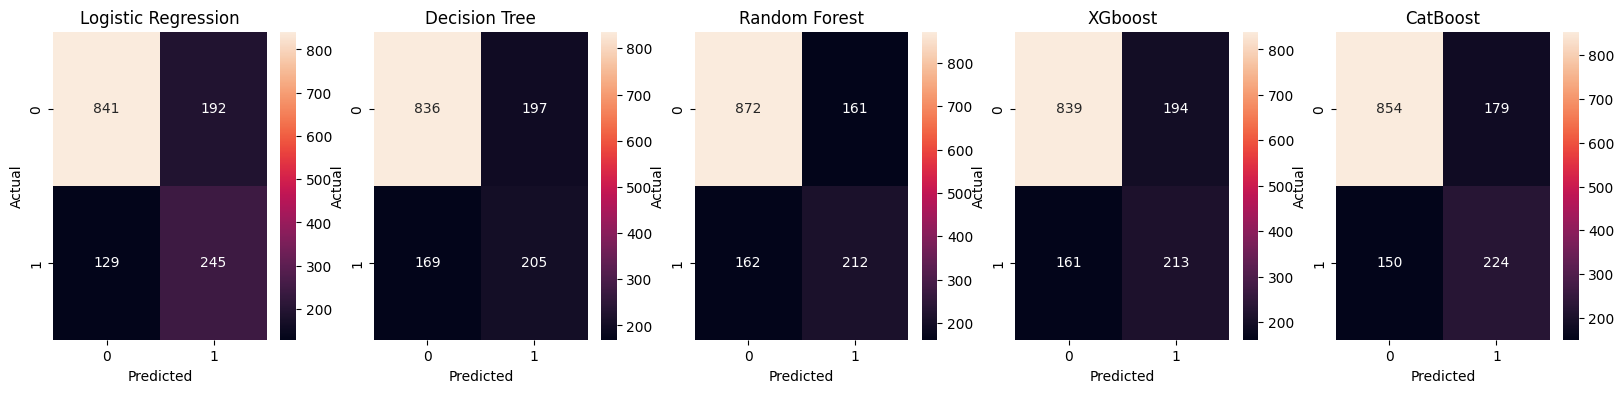

In [33]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['Decision Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['Random Forest'])
cm4 = confusion_matrix(Y_test, Y_hat_tests['XGBoost'])
cm5 = confusion_matrix(Y_test, Y_hat_tests['CatBoost'])


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 4))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_title('Decision Tree')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_title('Random Forest')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

sns.heatmap(cm4, annot=True, fmt='d', ax=ax4)
ax4.set_title('XGboost')
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')

sns.heatmap(cm5, annot=True, fmt='d', ax=ax5)
ax5.set_title('CatBoost')
ax5.set_xlabel('Predicted')
ax5.set_ylabel('Actual')

plt.show()